In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

In [5]:
df = pd.read_csv("uber_data.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               100000 non-null  int64  
 1   tpep_pickup_datetime   100000 non-null  object 
 2   tpep_dropoff_datetime  100000 non-null  object 
 3   passenger_count        100000 non-null  int64  
 4   trip_distance          100000 non-null  float64
 5   pickup_longitude       100000 non-null  float64
 6   pickup_latitude        100000 non-null  float64
 7   RatecodeID             100000 non-null  int64  
 8   store_and_fwd_flag     100000 non-null  object 
 9   dropoff_longitude      100000 non-null  float64
 10  dropoff_latitude       100000 non-null  float64
 11  payment_type           100000 non-null  int64  
 12  fare_amount            100000 non-null  float64
 13  extra                  100000 non-null  float64
 14  mta_tax                100000 non-nul

In [6]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [7]:
df.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.88327,1.929170,3.034270,-73.288983,40.375220,1.040120,-73.312418,40.388064,1.337770,13.252608,0.101695,0.497000,1.872531,0.367415,0.299496,16.390721
std,0.32110,1.589408,3.846951,7.089652,3.901413,0.284238,6.964171,3.833974,0.481356,11.685574,0.202166,0.042673,2.618611,1.527758,0.016642,14.437180
min,1.00000,0.000000,0.000000,-121.933327,0.000000,1.000000,-121.933327,0.000000,1.000000,-47.000000,-0.500000,-0.500000,-2.700000,0.000000,-0.300000,-47.300000
25%,2.00000,1.000000,0.990000,-73.990959,40.738891,1.000000,-73.990547,40.738541,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,2.00000,1.000000,1.670000,-73.980202,40.755299,1.000000,-73.978416,40.755079,1.000000,9.500000,0.000000,0.500000,1.360000,0.000000,0.300000,11.800000
75%,2.00000,2.000000,3.200000,-73.964203,40.769021,1.000000,-73.962090,40.767910,2.000000,15.000000,0.000000,0.500000,2.460000,0.000000,0.300000,18.300000
max,2.00000,6.000000,184.400000,0.000000,41.204548,6.000000,0.000000,42.666893,4.000000,819.500000,4.500000,0.500000,125.880000,25.540000,0.300000,832.800000


In [8]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


## Pre-Processing the data

In [9]:
# find the duration of each trip
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'],format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'],format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['duration']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']
df['duration']

0       0 days 00:07:55
1       0 days 00:11:06
2       0 days 00:31:06
3       0 days 00:00:00
4       0 days 00:00:00
              ...      
99995   0 days 00:05:05
99996   0 days 00:15:31
99997   0 days 00:20:13
99998   0 days 00:04:59
99999   0 days 00:04:49
Name: duration, Length: 100000, dtype: timedelta64[ns]

In [10]:
# find the duration of trip in minutes
df['duration_minutes'] = (df['duration'].dt.total_seconds() / 60).astype(float).round(2)
df['duration_minutes'].head()

0     7.92
1    11.10
2    31.10
3     0.00
4     0.00
Name: duration_minutes, dtype: float64

In [11]:
# Extract date, time, hour, and weekday
df['date'] = df['tpep_dropoff_datetime'].dt.date
df['time'] = df['tpep_dropoff_datetime'].dt.time
df['hour'] = df['tpep_dropoff_datetime'].dt.hour
df['weekday'] = df['tpep_dropoff_datetime'].dt.day_name()

# Display the DataFrame
df['hour'].head()

0    0
1    0
2    0
3    0
4    0
Name: hour, dtype: int32

In [12]:
## removing trips with duration less than 1 minute
df = df[df['duration_minutes'] >= 1]

In [13]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,duration_minutes,date,time,hour,weekday
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,...,2.05,0.0,0.3,12.35,0 days 00:07:55,7.92,2016-03-01,00:07:55,0,Tuesday
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,...,3.05,0.0,0.3,15.35,0 days 00:11:06,11.10,2016-03-01,00:11:06,0,Tuesday
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,...,8.00,0.0,0.3,63.80,0 days 00:31:06,31.10,2016-03-01,00:31:06,0,Tuesday
7,1,2016-03-01 00:00:01,2016-03-01 00:16:04,1,6.20,-73.788773,40.647758,1,N,-73.829208,...,0.00,0.0,0.3,21.80,0 days 00:16:03,16.05,2016-03-01,00:16:04,0,Tuesday
8,1,2016-03-01 00:00:01,2016-03-01 00:05:00,1,0.70,-73.958221,40.764641,1,N,-73.967896,...,2.00,0.0,0.3,8.80,0 days 00:04:59,4.98,2016-03-01,00:05:00,0,Tuesday


In [14]:
df = df[df['passenger_count'] > 0]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99252 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   VendorID               99252 non-null  int64          
 1   tpep_pickup_datetime   99252 non-null  datetime64[ns] 
 2   tpep_dropoff_datetime  99252 non-null  datetime64[ns] 
 3   passenger_count        99252 non-null  int64          
 4   trip_distance          99252 non-null  float64        
 5   pickup_longitude       99252 non-null  float64        
 6   pickup_latitude        99252 non-null  float64        
 7   RatecodeID             99252 non-null  int64          
 8   store_and_fwd_flag     99252 non-null  object         
 9   dropoff_longitude      99252 non-null  float64        
 10  dropoff_latitude       99252 non-null  float64        
 11  payment_type           99252 non-null  int64          
 12  fare_amount            99252 non-null  float64     

In [16]:
# filtering the rows which having charges greater than 1
df = df[df['fare_amount'] > 1]
df = df[df['total_amount'] > 1]
# and  and  and  and  and 

In [17]:
df.drop('store_and_fwd_flag',axis=1,inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99186 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   VendorID               99186 non-null  int64          
 1   tpep_pickup_datetime   99186 non-null  datetime64[ns] 
 2   tpep_dropoff_datetime  99186 non-null  datetime64[ns] 
 3   passenger_count        99186 non-null  int64          
 4   trip_distance          99186 non-null  float64        
 5   pickup_longitude       99186 non-null  float64        
 6   pickup_latitude        99186 non-null  float64        
 7   RatecodeID             99186 non-null  int64          
 8   dropoff_longitude      99186 non-null  float64        
 9   dropoff_latitude       99186 non-null  float64        
 10  payment_type           99186 non-null  int64          
 11  fare_amount            99186 non-null  float64        
 12  extra                  99186 non-null  float64     

In [19]:
df['payment_type'].value_counts()

payment_type
1    66261
2    32781
3      106
4       38
Name: count, dtype: int64

In [20]:
def toCategory(value):
    if value == 2:
        return 'Cash Payment'
    elif value == 1:
        return 'UPI Payment'
    elif value == 3:
        return 'Uber wallet'
    
    else:
        return 'Other'
    
df['payment_type'] = df['payment_type'].apply(toCategory)

df['payment_type'].value_counts()

payment_type
UPI Payment     66261
Cash Payment    32781
Uber wallet       106
Other              38
Name: count, dtype: int64

## Exploratory Data Analysis

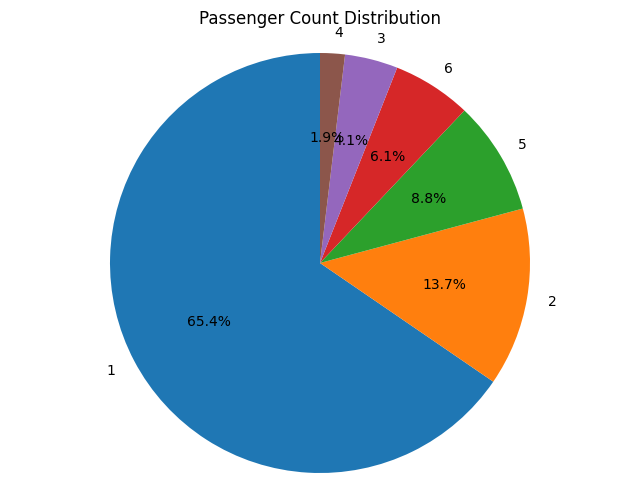

In [21]:
# # Frequency of the passenger_count
# ax = sns.countplot(data=df,x='passenger_count',hue='passenger_count')
# sns.set(rc={'figure.figsize':(5,4)})
# for bars in ax.containers:
#     ax.bar_label(bars)
# # sns.set
# # sns.countplot(data=df,x='passenger_count',hue='passenger_count')

passenger_count_counts = df['passenger_count'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(passenger_count_counts, labels=passenger_count_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Passenger Count Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()


<i>From the above picture, we understand single passengers is having maximum number of raids.<i>

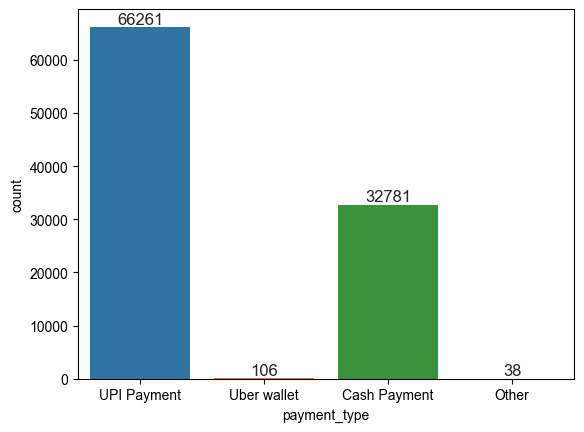

In [22]:
# frequency of mode of payments done
ax = sns.countplot(data=df,x='payment_type',hue='payment_type')
sns.set(rc={'figure.figsize':(5,4)})
for bars in ax.containers:
    ax.bar_label(bars)





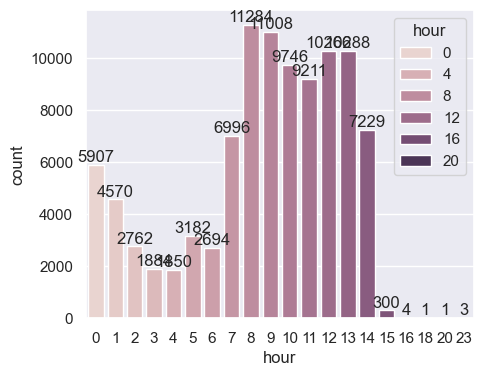

In [23]:
# Hourwise number of raids
ax = sns.countplot(data=df,x='hour',hue='hour')
sns.set(rc={'figure.figsize':(25,15)})
for bars in ax.containers:
    ax.bar_label(bars)





<I>From the above graph, we understand more number of raids is happening between 8AM - 9AM<I>

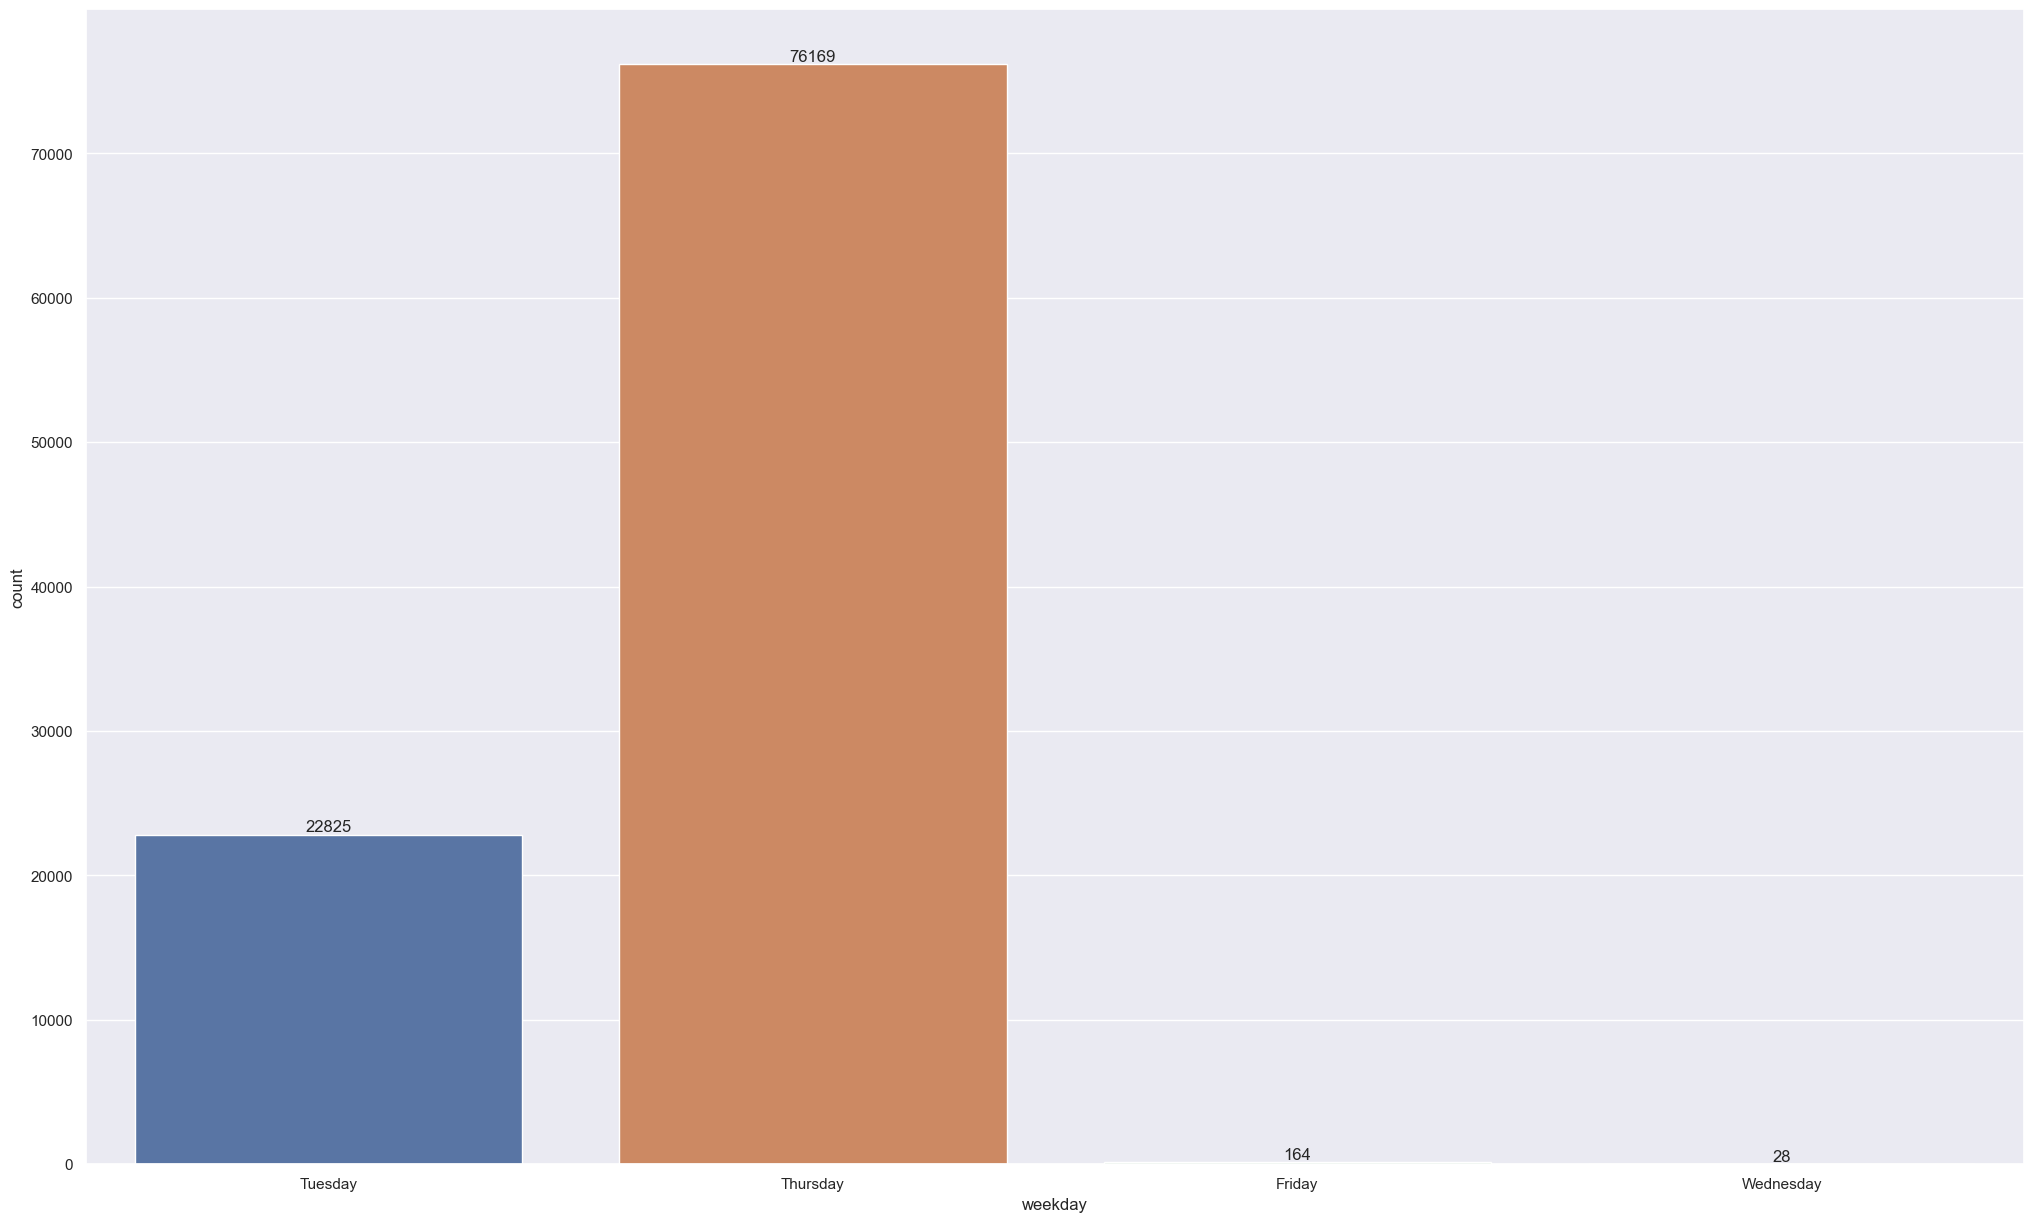

In [24]:
# Day-wise number of raids
ax = sns.countplot(data=df,x='weekday',hue='weekday')
sns.set(rc={'figure.figsize':(5,6)})
for bars in ax.containers:
    ax.bar_label(bars)

<i>Most number of raids happening in Thursday.<i>

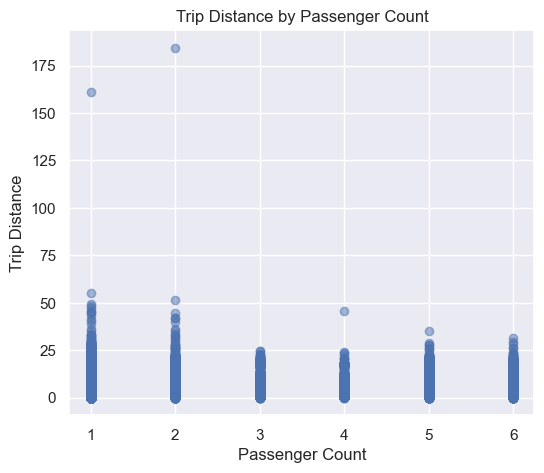

In [25]:
# @title Trip Distance by Passenger Count

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.scatter(df['passenger_count'], df['trip_distance'], alpha=0.5)
plt.xlabel('Passenger Count')
plt.ylabel('Trip Distance')
_= plt.title('Trip Distance by Passenger Count')

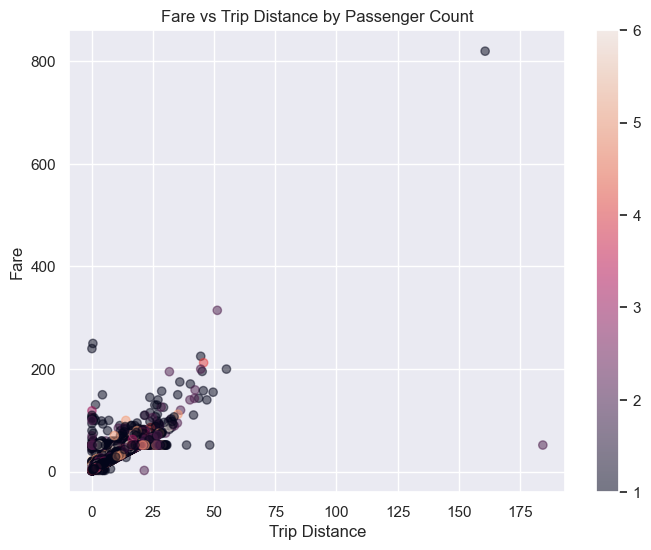

In [26]:
# @title Fare vs Trip Distance by Passenger Count

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(df['trip_distance'], df['fare_amount'], c=df['passenger_count'], alpha=0.5)
plt.xlabel('Trip Distance')
plt.ylabel('Fare')
plt.title('Fare vs Trip Distance by Passenger Count')
_ = plt.colorbar()

<Axes: >

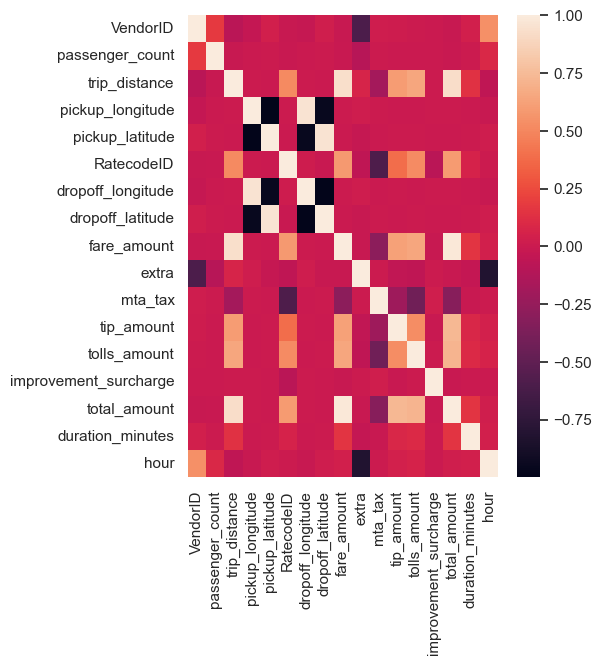

In [27]:
#Heatmap finding the correlation between different features

sns.heatmap(df.corr(numeric_only=True))

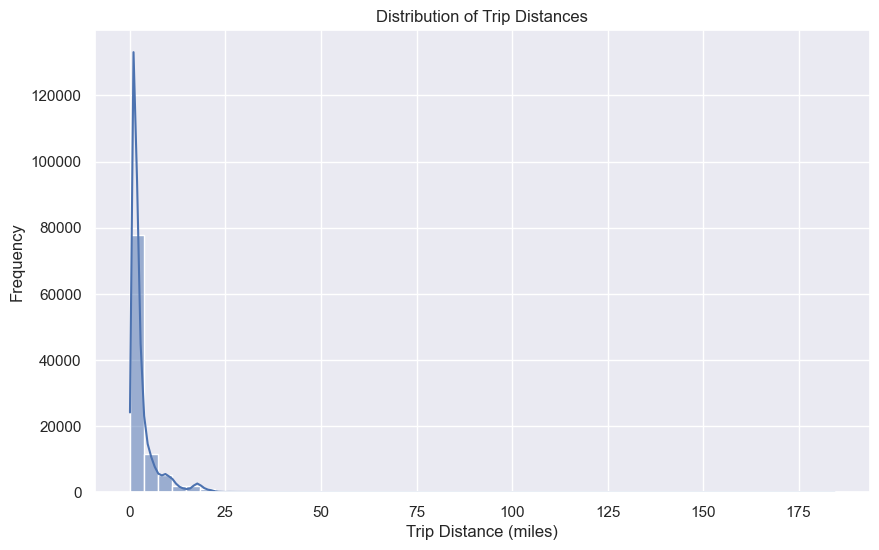

In [28]:


# Example: Distribution of trip distances
plt.figure(figsize=(10, 6))
sns.histplot(df['trip_distance'], bins=50, kde=True)
plt.title('Distribution of Trip Distances')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.show()


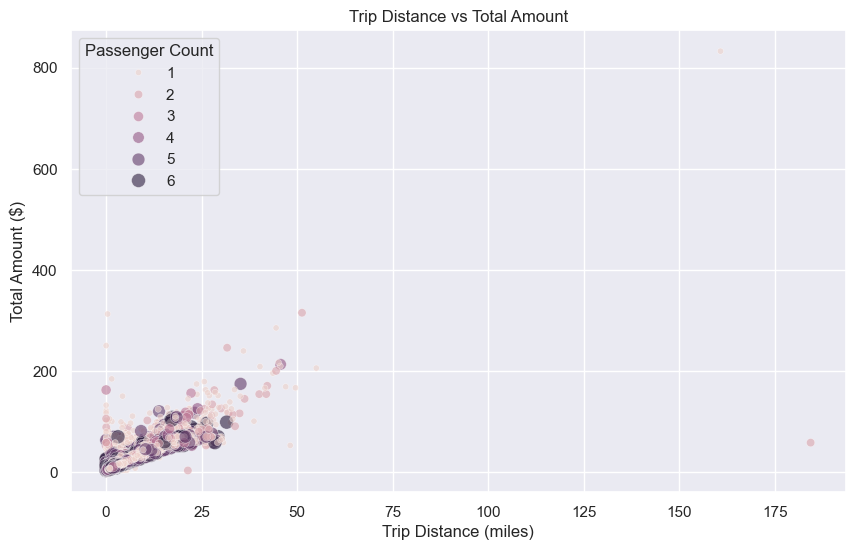

In [38]:
# relationship between trip_distance, total amount with passenger_count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='trip_distance', y='total_amount', hue='passenger_count', size='passenger_count', sizes=(20, 100), alpha=0.6)
plt.title('Trip Distance vs Total Amount')
plt.xlabel('Trip Distance (kilometers)')
plt.ylabel('Total Amount ($)')
plt.legend(title='Passenger Count')
plt.show()

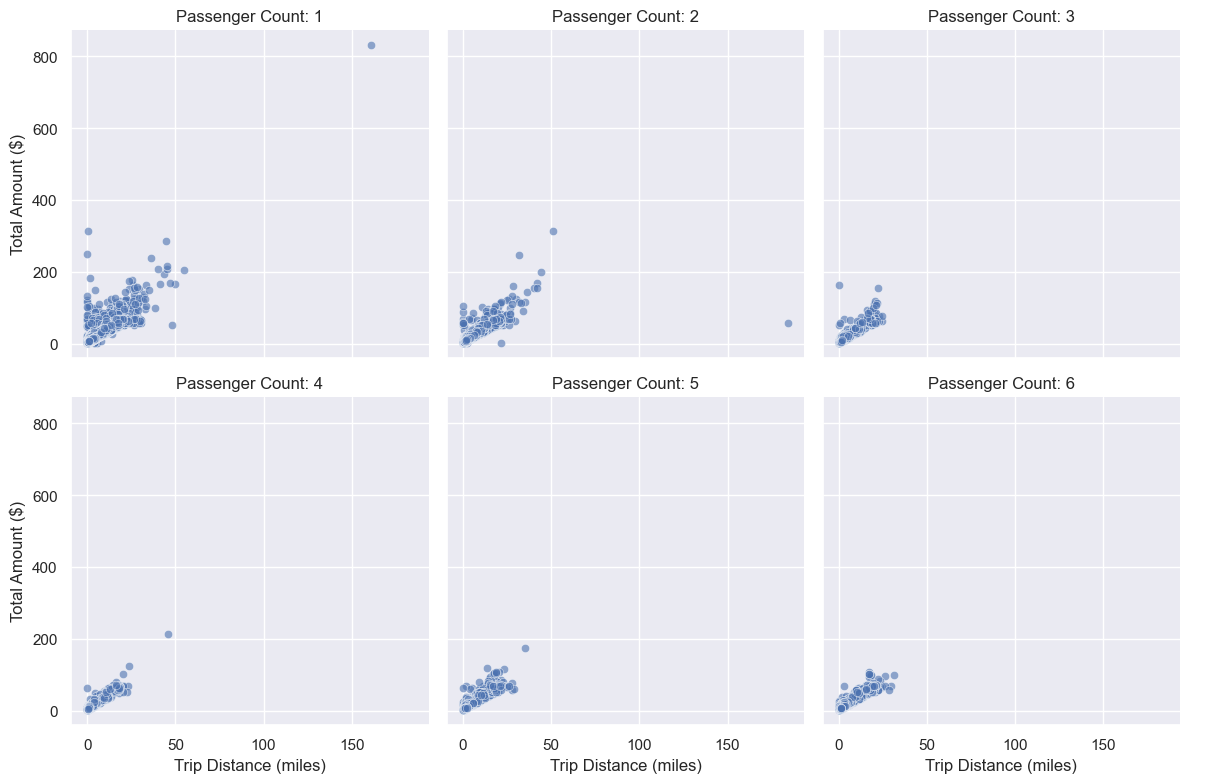

In [41]:
# to visualize the relationship across different passenger counts, we use a FacetGrid to create multiple scatter plots.

g = sns.FacetGrid(df, col='passenger_count', col_wrap=3, height=4)
g.map(sns.scatterplot, 'trip_distance', 'total_amount', alpha=0.6)
g.add_legend()
g.set_axis_labels('Trip Distance (miles)', 'Total Amount ($)')
g.set_titles(col_template='Passenger Count: {col_name}')
plt.show()

## ML Modelling

In [29]:
x=df[['passenger_count','trip_distance','duration_minutes']]

In [30]:
y=df['total_amount']

### Linear Regression model

In [31]:
# create an linear regression model
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


model1 = LinearRegression()

model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)

Mean Absolute Error: 2.6807050995442827
Mean Squared Error: 29.81649992610868
Root Mean Squared Error: 5.460448692745742
R2 score: 0.8650532422807644


### Elastic Net model

In [32]:
# Create an elastic net regression model
model2 = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Train the model
model2.fit(X_train, y_train)

# Make predictions
y_pred = model2.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)

Mean Absolute Error: 2.686844712132659
Mean Squared Error: 29.917298997857653
Root Mean Squared Error: 5.469670830850578
R2 score: 0.8645970348805886


### Decision Tree Regression

In [33]:
# created decision tree regression
model3 = DecisionTreeRegressor()

# Train the model
model3.fit(X_train, y_train)

# Make predictions
y_pred = model3.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)


Mean Absolute Error: 2.2668636959370905
Mean Squared Error: 63.80906973014752
Root Mean Squared Error: 7.988057944841632
R2 score: 0.7112059733871046


### Random forest Regressor

In [34]:
# random forest regressor
model4 = RandomForestRegressor(n_estimators=100)

# Train the model
model4.fit(X_train, y_train)

# Make predictions
y_pred = model4.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)

Mean Absolute Error: 1.835198921873311
Mean Squared Error: 46.27287470758802
Root Mean Squared Error: 6.802416828421205
R2 score: 0.790573191769247


### Gradient Boosting Regressor


In [35]:
model5 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
model5.fit(X_train, y_train)

# Make predictions
y_pred = model5.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)

Mean Absolute Error: 1.7173010362405616
Mean Squared Error: 48.65523236276004
Root Mean Squared Error: 6.975330269081174
R2 score: 0.7797908584273127


### Support vector regressor model



In [36]:
# model6 = SVR()

# # Train the model
# model6.fit(X_train, y_train)

# # Make predictions
# y_pred = model6.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error: {mse}')

# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# r2 = r2_score(y_test, y_pred)
# print("R2 score:", r2)